In [ ]:
# Import required libraries
import pandas as pd

# Load the CSV files into separate DataFrames
plant1_gen = pd.read_csv("C:/Users/91797/Dropbox/My PC (LAPTOP-O7694M56)/Desktop/live projrct/Plant_1_Generation_Data.csv")
plant1_weather = pd.read_csv("C:/Users/91797/Dropbox/My PC (LAPTOP-O7694M56)/Desktop/live projrct/Plant_1_Weather_Sensor_Data.csv")
plant2_gen = pd.read_csv("C:/Users/91797/Dropbox/My PC (LAPTOP-O7694M56)/Desktop/live projrct/Plant_2_Generation_Data.csv")
plant2_weather = pd.read_csv("C:/Users/91797/Dropbox/My PC (LAPTOP-O7694M56)/Desktop/live projrct/Plant_2_Weather_Sensor_Data.csv")

# Preview each DataFrame
print("Plant 1 Generation Data:")
print(plant1_gen.head())
print("\nPlant 1 Weather Data:")
print(plant1_weather.head())
print("\nPlant 2 Generation Data:")
print(plant2_gen.head())
print("\nPlant 2 Weather Data:")
print(plant2_weather.head())


Plant 1 Generation Data:
          DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  15-05-2020 00:00   4135001  1BY6WEcLGh8j5v7       0.0       0.0   
1  15-05-2020 00:00   4135001  1IF53ai7Xc0U56Y       0.0       0.0   
2  15-05-2020 00:00   4135001  3PZuoBAID5Wc2HD       0.0       0.0   
3  15-05-2020 00:00   4135001  7JYdWkrLSPkdwr4       0.0       0.0   
4  15-05-2020 00:00   4135001  McdE0feGgRqW7Ca       0.0       0.0   

   DAILY_YIELD  TOTAL_YIELD  
0          0.0    6259559.0  
1          0.0    6183645.0  
2          0.0    6987759.0  
3          0.0    7602960.0  
4          0.0    7158964.0  

Plant 1 Weather Data:
             DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4135001  HmiyD2TTLFNqkNe            25.184316   
1  2020-05-15 00:15:00   4135001  HmiyD2TTLFNqkNe            25.084589   
2  2020-05-15 00:30:00   4135001  HmiyD2TTLFNqkNe            24.935753   
3  2020-05-15 00:45:00   4135001  HmiyD2TTLFNqkNe      

In [3]:
# Data Cleaning and Formatting

# Function to clean and format a DataFrame
def clean_data(df):
    # Convert columns to datetime format where necessary
    if 'DATE_TIME' in df.columns:
        df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], errors='coerce')
    
    # Drop rows with missing DATE_TIME values, if any
    df.dropna(subset=['DATE_TIME'], inplace=True)

    # Fill or drop other missing values based on context (e.g., fill with 0 or mean)
    df.fillna(0, inplace=True)  # Or consider filling with specific values based on column analysis
    
    return df

# Apply cleaning function to each dataset
plant1_gen = clean_data(plant1_gen)
plant1_weather = clean_data(plant1_weather)
plant2_gen = clean_data(plant2_gen)
plant2_weather = clean_data(plant2_weather)

# Confirm the data types are correct
print(plant1_gen.info())
print(plant1_weather.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68778 entries, 0 to 68777
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE_TIME    68778 non-null  datetime64[ns]
 1   PLANT_ID     68778 non-null  int64         
 2   SOURCE_KEY   68778 non-null  object        
 3   DC_POWER     68778 non-null  float64       
 4   AC_POWER     68778 non-null  float64       
 5   DAILY_YIELD  68778 non-null  float64       
 6   TOTAL_YIELD  68778 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 3.7+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            3182 non-null   datetime64[ns]
 1   PLANT_ID             3182 non-null   int64         
 2   SOURCE_KEY           3182 

C:\Users\91797\AppData\Local\Temp\ipykernel_13596\405473954.py:7: UserWarning: Parsing dates in %d-%m-%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['DATE_TIME'] = pd.to_datetime(df['DATE_TIME'], errors='coerce')


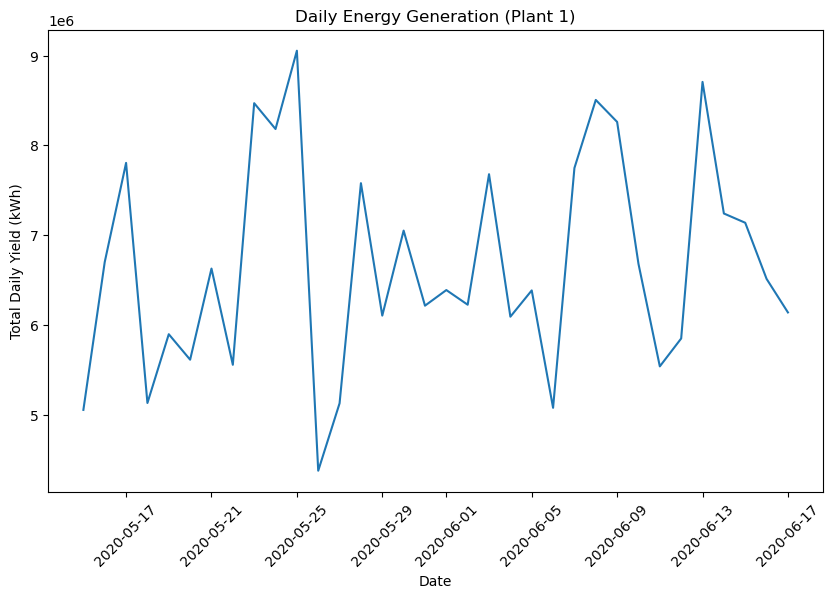

In [5]:
#1. Daily Energy Generation Over Time (Line Plot)
import matplotlib.pyplot as plt

# Aggregate data by date to find daily generation totals
plant1_gen['DATE'] = plant1_gen['DATE_TIME'].dt.date
daily_gen = plant1_gen.groupby('DATE')['DAILY_YIELD'].sum()

# Plot the daily energy generation
plt.figure(figsize=(10, 6))
daily_gen.plot(kind='line')
plt.title("Daily Energy Generation (Plant 1)")
plt.xlabel("Date")
plt.ylabel("Total Daily Yield (kWh)")
plt.xticks(rotation=45)
plt.show()


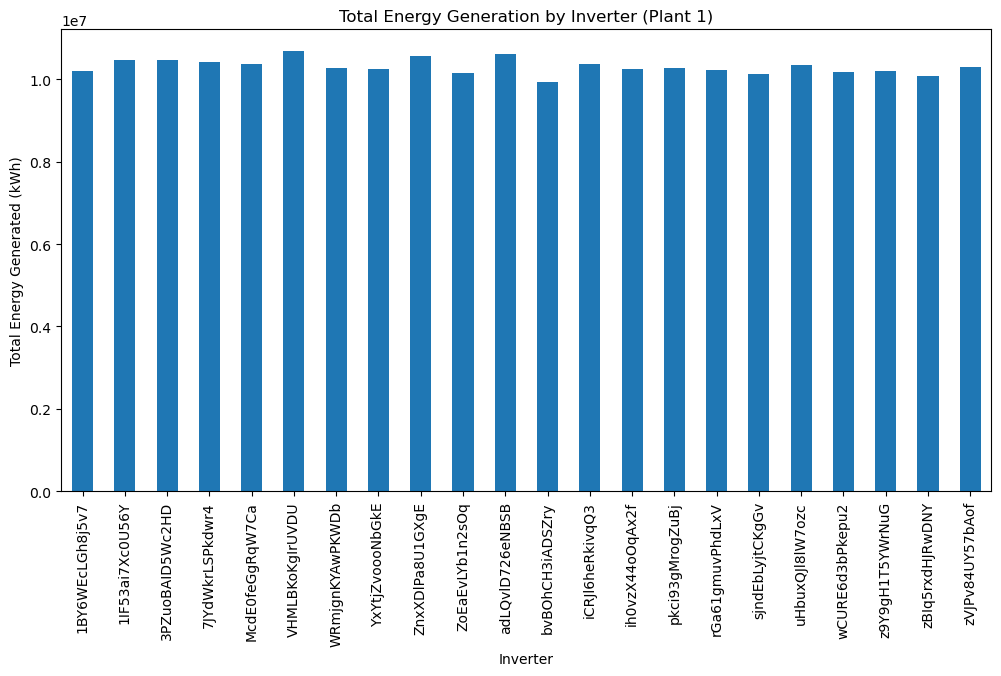

In [6]:
#2. Power Generation Distribution by Inverter (Bar Plot)
# Calculate total generation by inverter
inverter_gen = plant1_gen.groupby('SOURCE_KEY')['DAILY_YIELD'].sum()

# Plot total generation per inverter
inverter_gen.plot(kind='bar', figsize=(12, 6))
plt.title("Total Energy Generation by Inverter (Plant 1)")
plt.xlabel("Inverter")
plt.ylabel("Total Energy Generated (kWh)")
plt.show()


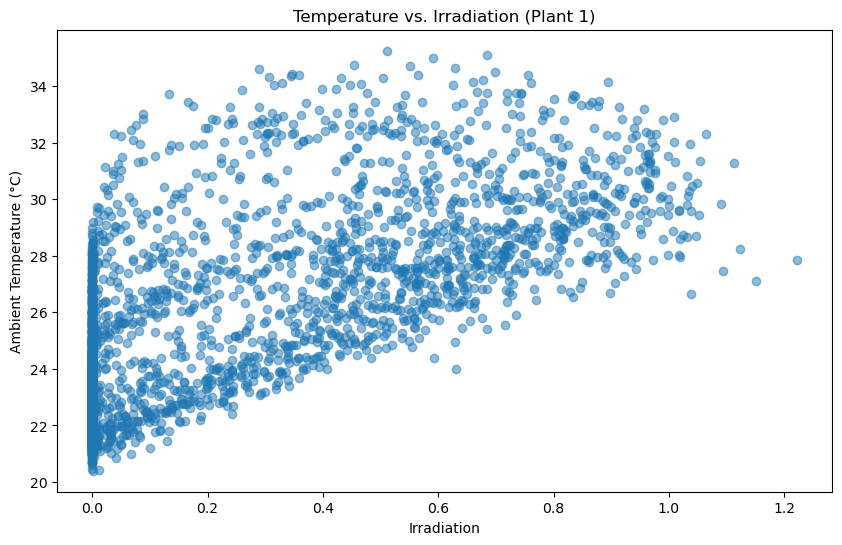

In [7]:
#3. Temperature and Irradiation Relationship (Scatter Plot)
# Scatter plot to observe the relationship between temperature and irradiation
plt.figure(figsize=(10, 6))
plt.scatter(plant1_weather['IRRADIATION'], plant1_weather['AMBIENT_TEMPERATURE'], alpha=0.5)
plt.title("Temperature vs. Irradiation (Plant 1)")
plt.xlabel("Irradiation")
plt.ylabel("Ambient Temperature (°C)")
plt.show()
